Confusion Matrix:
 [[242   5]
 [ 41   6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       247
           1       0.55      0.13      0.21        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.81      0.84      0.80       294

Accuracy Score: 0.8435374149659864


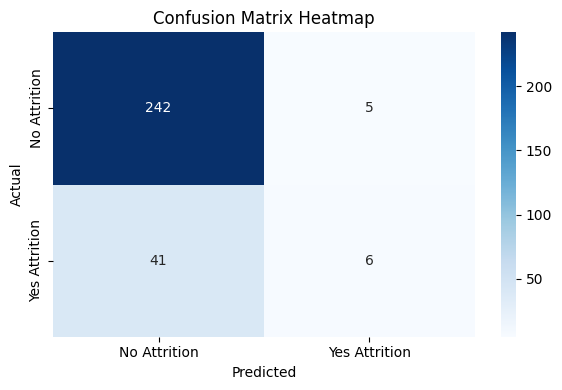

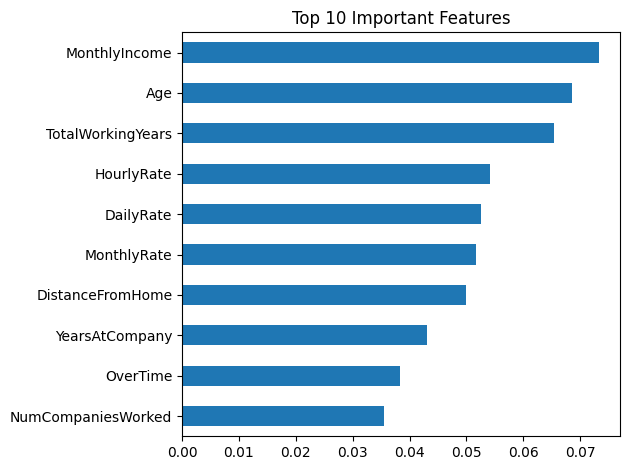

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('6. Predict Employee Attrition.csv')

# Drop irrelevant or constant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

# Encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split data into features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Yes Attrition'],
            yticklabels=['No Attrition', 'Yes Attrition'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importance Plot
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
